In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

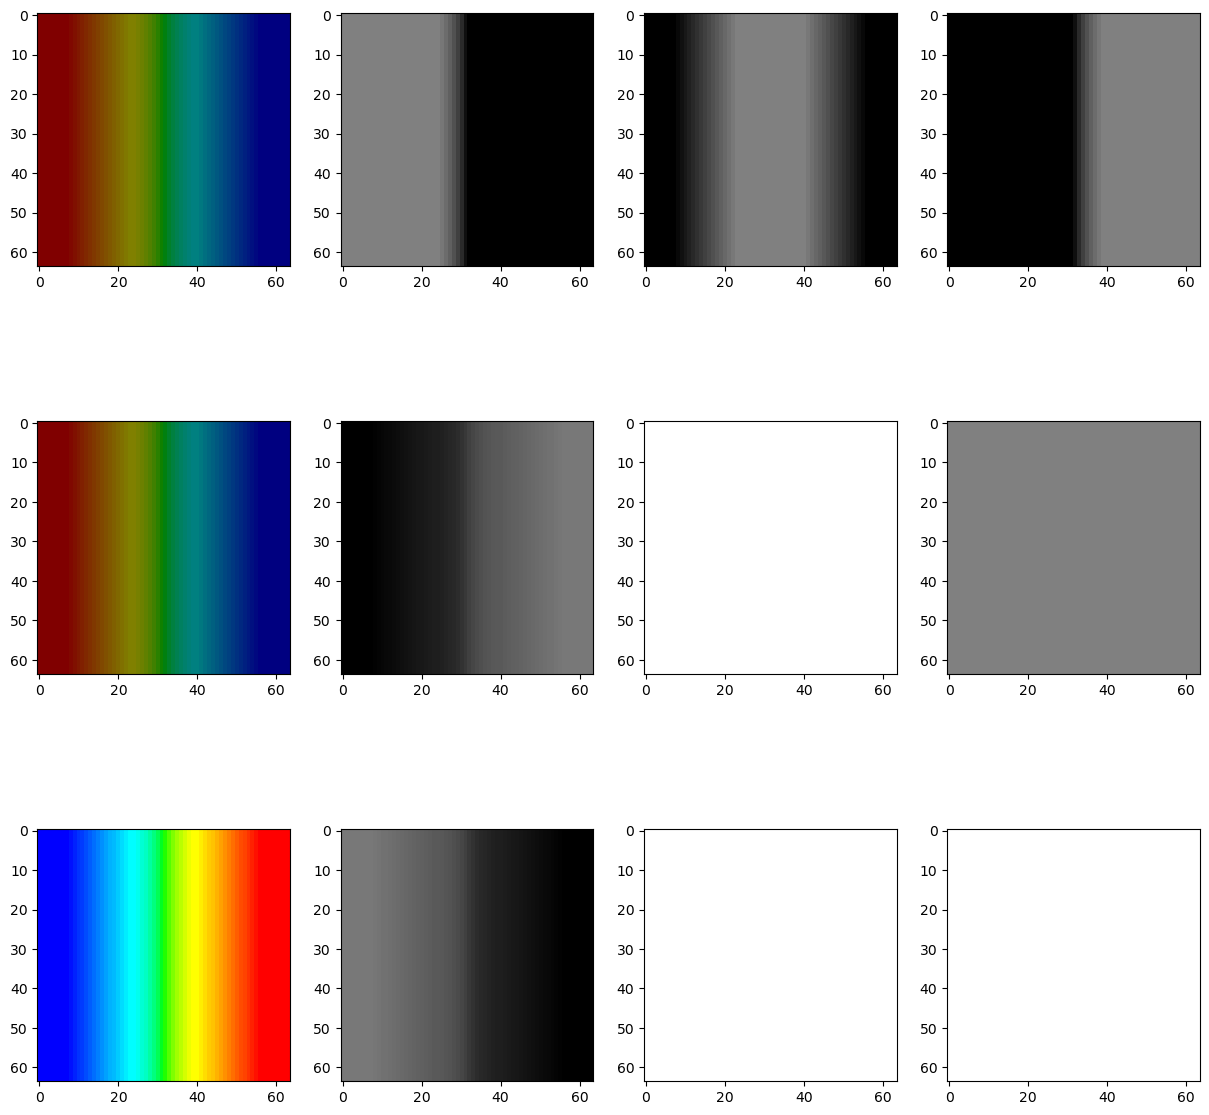

In [73]:
patron = cv.imread("imagenes/patron.tif")


patron = cv.cvtColor(patron,cv.COLOR_BGR2RGB)
RGB = cv.split(patron)

patronHSV = cv.cvtColor(patron, cv.COLOR_RGB2HSV)
HSV = cv.split(patronHSV)

HSV_2 = np.copy(HSV)
HSV_2[0] = cv.flip(HSV_2[0],1)
HSV_2[2] = 255*np.ones(HSV_2[2].shape)
patron_2 = cv.cvtColor(cv.merge(HSV_2), cv.COLOR_HSV2RGB)

fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(15,15)) 
ax[0,0].imshow(patron)
ax[0,1].imshow(RGB[0],cmap="gray",vmin=0,vmax=255)
ax[0,2].imshow(RGB[1],cmap="gray",vmin=0,vmax=255)
ax[0,3].imshow(RGB[2],cmap="gray",vmin=0,vmax=255)

ax[1,0].imshow(patron)
ax[1,1].imshow(HSV[0],cmap="gray",vmin=0,vmax=255)
ax[1,2].imshow(HSV[1],cmap="gray",vmin=0,vmax=255)
ax[1,3].imshow(HSV[2],cmap="gray",vmin=0,vmax=255)

ax[2,0].imshow(patron_2)
ax[2,1].imshow(HSV_2[0],cmap="gray",vmin=0,vmax=255)
ax[2,2].imshow(HSV_2[1],cmap="gray",vmin=0,vmax=255)
ax[2,3].imshow(HSV_2[2],cmap="gray",vmin=0,vmax=255)

plt.show()

In [83]:
x=[1,2,3,4,5]
for i in x:
    x
x

1
2
3
4
5


[1, 2, 3, 4, 5]

In [108]:
def img_complemento(img):
    rosasHSV = cv.cvtColor(img,cv.COLOR_BGR2HSV)
    HSV = cv.split(rosasHSV)
    for i in range(HSV[0].shape[0]):
        for j in range(HSV[0].shape[1]):
            if HSV[0][i,j]>90:
                HSV[0][i,j]-= 90
            else:
                HSV[0][i,j]+= 90
                
    img_clm = cv.cvtColor(cv.merge(HSV), cv.COLOR_HSV2BGR)
    return img_clm

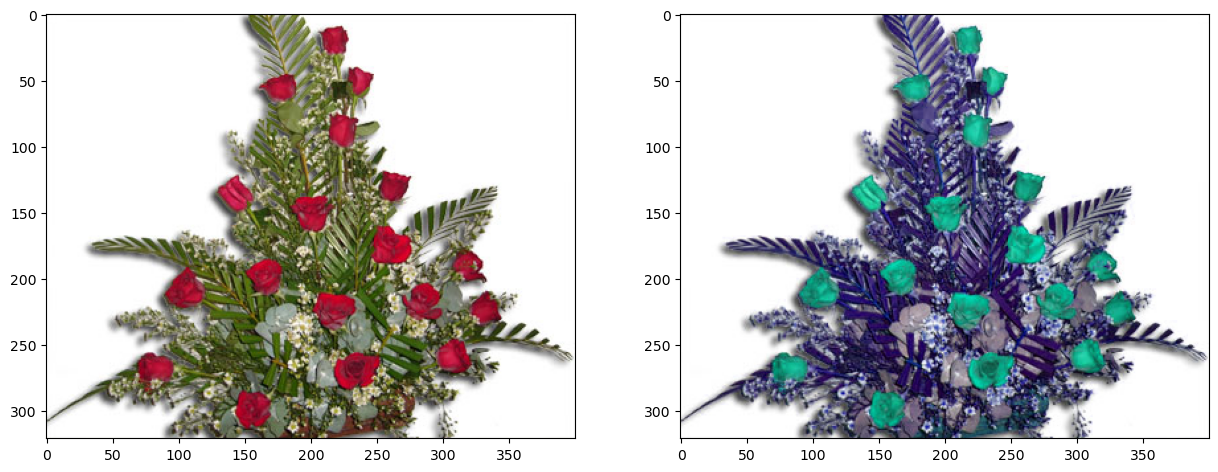

In [110]:
rosas = cv.imread("imagenes/rosas.jpg")

rosas_complemento = img_complemento(rosas)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,15)) 
ax[0].imshow(rosas[:,:,[2,1,0]])
ax[1].imshow(rosas_complemento[:,:,[2,1,0]])

plt.show()

In [163]:
def perfilesRGB(img,fila):
    imgHSV = cv.cvtColor(img,cv.COLOR_BGR2HSV)
    HSV = cv.split(imgHSV)


    img_line=img.copy()
    img_line[fila,:]=0

    fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15,15)) 
    ax[0,0].imshow(img_line[:,:,[2,1,0]])

    ax[0,1].plot(img[fila,:,2])
    ax[0,2].plot(img[fila,:,1])
    ax[0,3].plot(img[fila,:,0])

    ax[1,0].imshow(img_line[:,:,[2,1,0]])
    ax[1,1].plot(HSV[0][fila,:])
    ax[1,2].plot(HSV[1][fila,:])
    ax[1,3].plot(HSV[2][fila,:])

    plt.show()


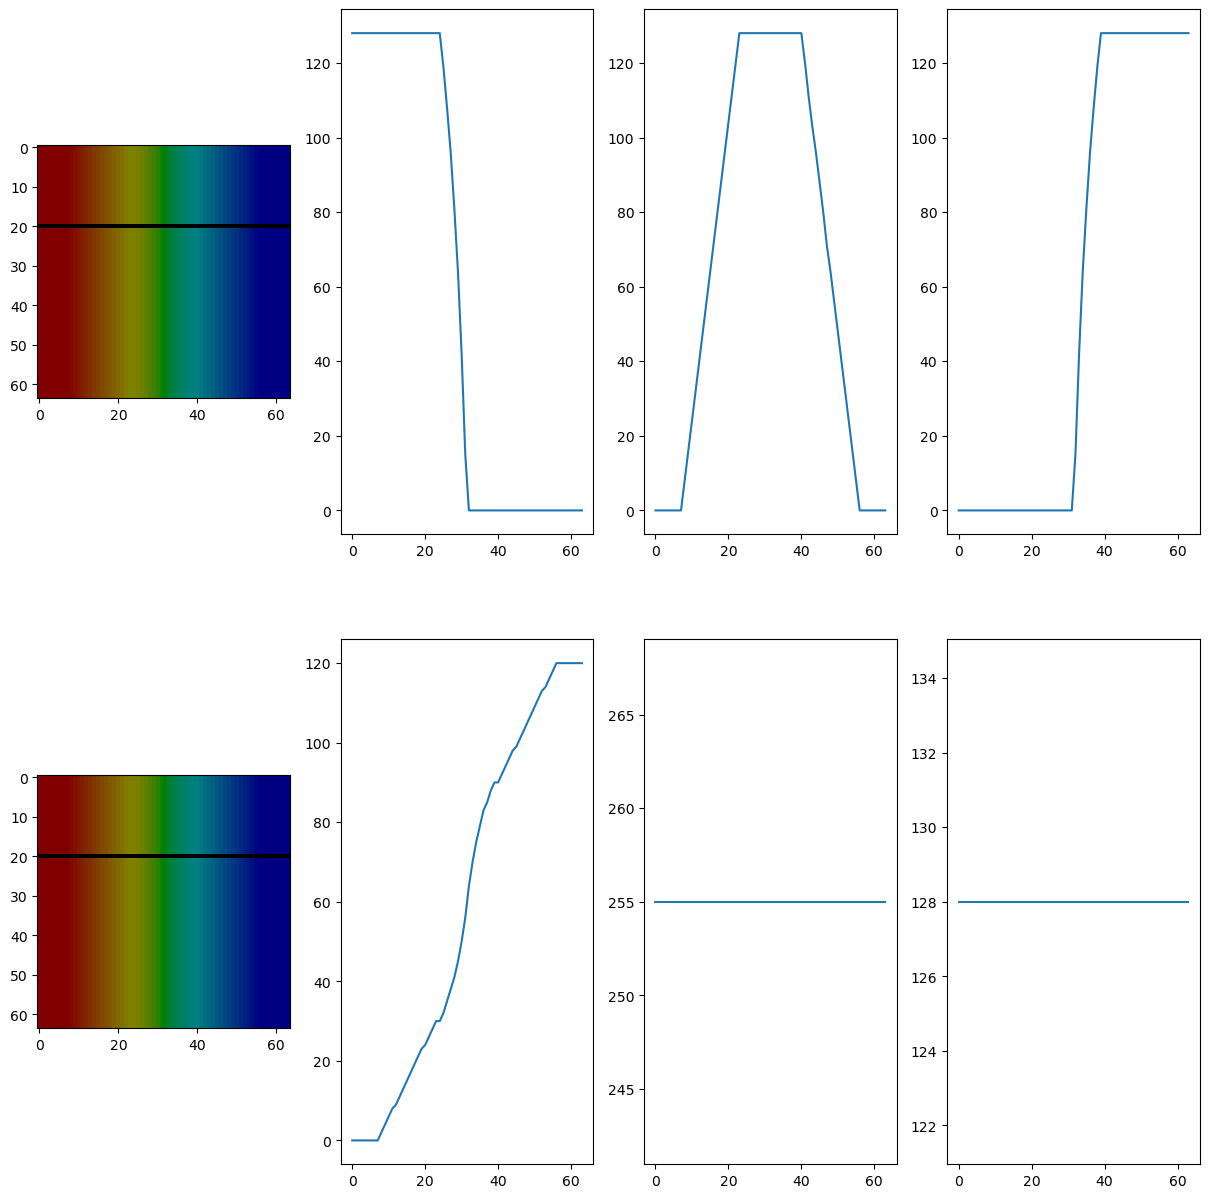

In [171]:
rosas = cv.imread("imagenes/rosas.jpg")

fila=int(rosas.shape[0]/2)
#perfilesRGB(rosas,fila)

patron = cv.imread("imagenes/patron.tif")
perfilesRGB(patron,20)

# EJERCICIO 2


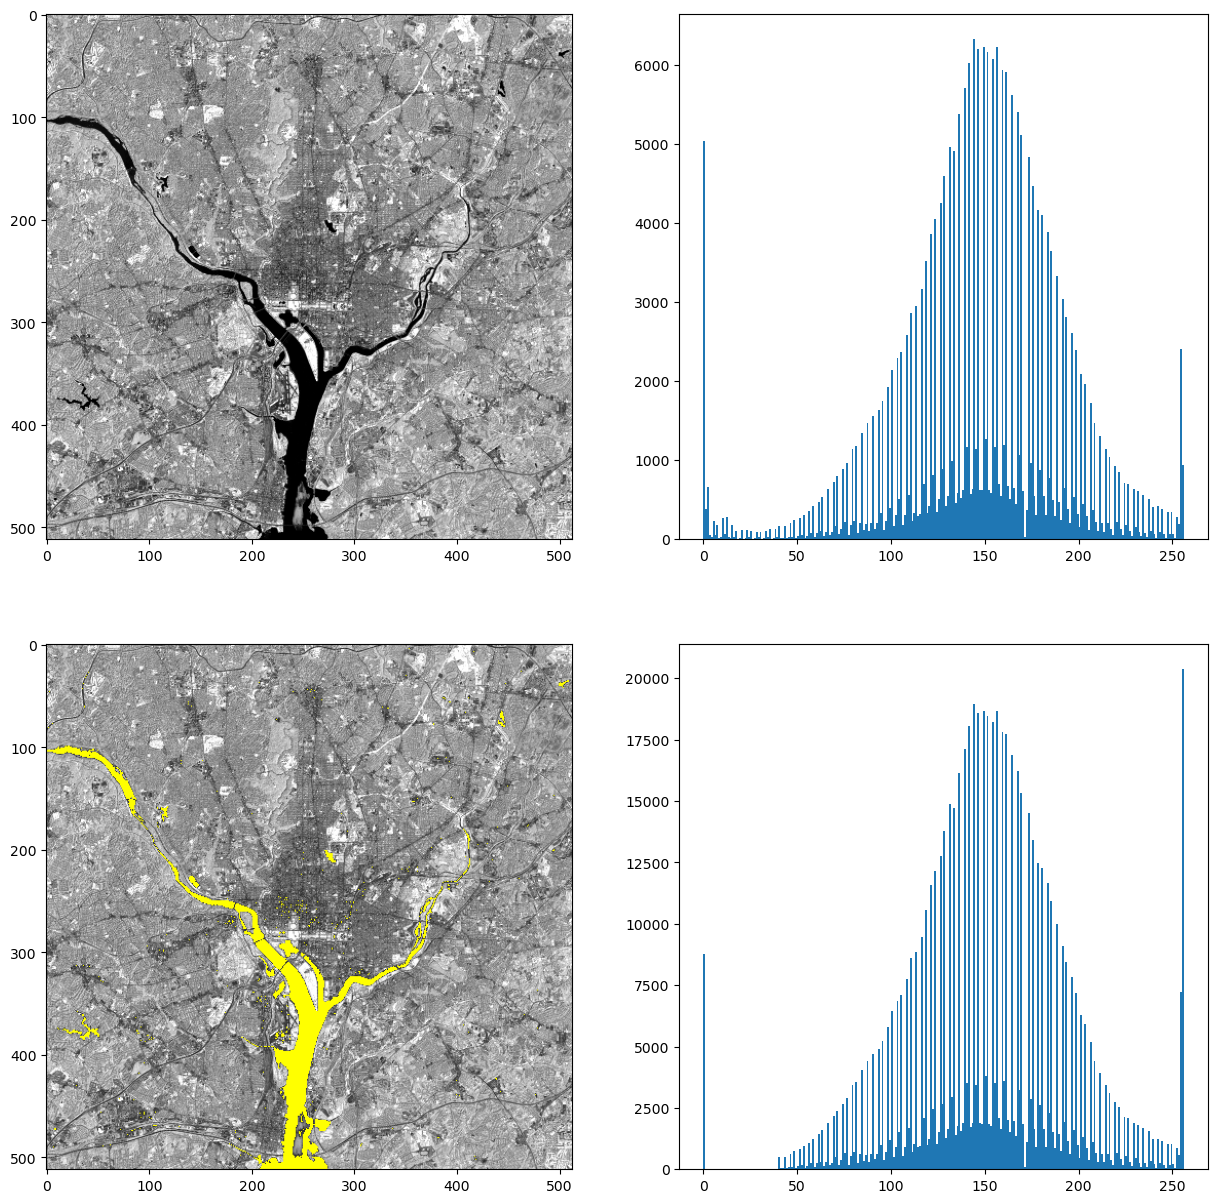

In [203]:
rio = cv.imread("imagenes/rio.jpg",cv.IMREAD_GRAYSCALE)
rio_hst = np.histogram(rio)

rango=40

RGB = np.array([rio,rio,rio])

for i in range(rio.shape[0]):
    for j in range(rio.shape[1]):
        if rio[i,j]<rango:
            RGB[0][i,j] = 255
            RGB[1][i,j] = 255
            RGB[2][i,j] = 0

rioRGB = cv.merge(RGB)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15)) 
ax[0,0].imshow(rio,cmap="gray",vmin=0,vmax=255)
ax[0,1].hist(rio.ravel(),256,[0,256])
ax[1,0].imshow(rioRGB)
ax[1,1].hist(rioRGB.ravel(),256,[0,256])
plt.show()
